# **Homework - Unsupervised Learning - Datalicious**

**Anggota Kelompok :**
- Nur Imam Masri
- Astuti Rahmawati
- Prasidya Bagaskara
- Moh. Harwin Prayoga
- Riskiyatul Hasanah
- M Rayhan Azzindani
- Siti Hajjah Mardiah
- Christine
- M. Ifzal Asril

# **Deskripsi Dataset**

Dataset ini berisi data customer sebuah perusahaan penerbangan dan beberapa fitur yang dapat menggambarkan value dari customer tersebut. Setiap baris mewakili customer, setiap kolom berisi atribut customer. Untuk dataset bisa diakses melalui [link ini](https://drive.google.com/file/d/14G4xOWK5e-QQ9S7GmBwULChNdeJZXs2U/view?usp=drive_link)

- `MEMBER_NO-b` : ID Member
- `FFP_DATE` : Frequent Flyer Program Join Date
- `FIRST_FLIGHT_DATE` : Tanggal Penerbangan pertama
- `GENDER` : Jenis Kelamin
- `FFP_TIER` : Tier dari Frequent Flyer Program
- `WORK_CITY` : Kota Asal
- `WORK_PROVINCE` : Provinsi Asal
- `WORK_COUNTRY` : Negara Asal
- `AGE` : Umur Customer
- `LOAD_TIME` : Tanggal data diambil
- `FLIGHT_COUNT` : Jumlah penerbangan Customer
- `BP_SUM` : Rencana Perjalanan
- `SUM_YR_1` : Fare Revenue
- `SUM_YR_2` : Votes Prices
- `SEG_KM_SUM` : Total jarak(km) penerbangan yg sudah dilakukan
- `LAST_FLIGHT_DATE` : Tanggal penerbangan terakhir
- `LAST_TO_END` : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
- `AVG_INTERVAL` : Rata-rata jarak waktu
- `MAX_INTERVAL` : Maksimal jarak waktu
- `EXCHANGE_COUNT` : Jumlah penukaran
- `avg_discount` : Rata rata discount yang didapat customer
- `Points_Sum` : Jumlah poin yang didapat customer
- `Point_NotFlight` : point yang tidak digunakan oleh members

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Exploratory Data Analysis(EDA)

## Load Dataset

In [2]:
df= pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


## Descriptive Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

- Data set terdiri dari 62988 baris dan 23 kolom
- Tidak ditemukan ada baris yang duplikat
- Pada kolom GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1 dan SUM_YR_2 terdapat missing values
- Data yang mengandung tanggal namun  tipedatanya belum sesuai, akan diganti menjadi datetime

### Check Duplicate Values

In [4]:
df.duplicated().sum()

0

In [5]:
df.duplicated(subset=["MEMBER_NO"]).sum()

0

Tidak ada duplicate pada keseluruhan data

### Check Missing Values

In [6]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc

Missing values status: True


,Total Null Values,Percentage,Data Type
WORK_PROVINCE,3248,5.156538,int64
WORK_CITY,2269,3.602273,int64
SUM_YR_1,551,0.874770,float64
AGE,420,0.666794,int64
SUM_YR_2,138,0.219089,int64
WORK_COUNTRY,26,0.041278,float64
GENDER,3,0.004763,int64
MEMBER_NO,0,0.000000,int64
avg_discount,0,0.000000,object
EXCHANGE_COUNT,0,0.000000,object


### Data types

In [7]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [8]:
nums= ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']
cats= ['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY','FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']
timestamp = ['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']

**Desciptive Statistic**

In [9]:
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


- Dari beberapa kolom numerik mengindikasikan adanya outlier apabila diamati dari perbandingan antara mean dan mediannya.

- Kolom AGE yang menunjukkan umur customer menunjukkan angka yang luamyan jauh untuk min dan max yaitu pada umur 6 dan 110 tahun.

- Kolom EXCHANGE_COUNT dan Point_NotFlight memiliki nilai yang lumayan sangat aneh dari segi distribusi nilai, 75% customer memiliki nilai 0, sedangkan 50% customer diharapkan memiliki poin habis digunakan.

In [10]:
df[cats].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE
count,62985,60719,59740,62962,62988,62988,62988,62988
unique,2,3234,1165,118,3068,3406,1,731
top,Male,guangzhou,guangdong,CN,1/13/2011,2/16/2013,3/31/2014,3/31/2014
freq,48134,9386,17509,57748,184,96,62988,959


In [11]:
#value cats counting
for col in cats:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom GENDER:
--------------------------------------------------
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolom WORK_CITY:
--------------------------------------------------
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64

Value count kolom WORK_PROVINCE:
--------------------------------------------------
guangdong        17509
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: WORK_PROVINCE, Length: 1165, dtype: int64

Value count kolom WORK_COUNTRY:
--------------------------------------------------
CN    57748
HK      991
JP      875
KR      790
US      575
      ...  

## Unvariate Analysis

### Outliers

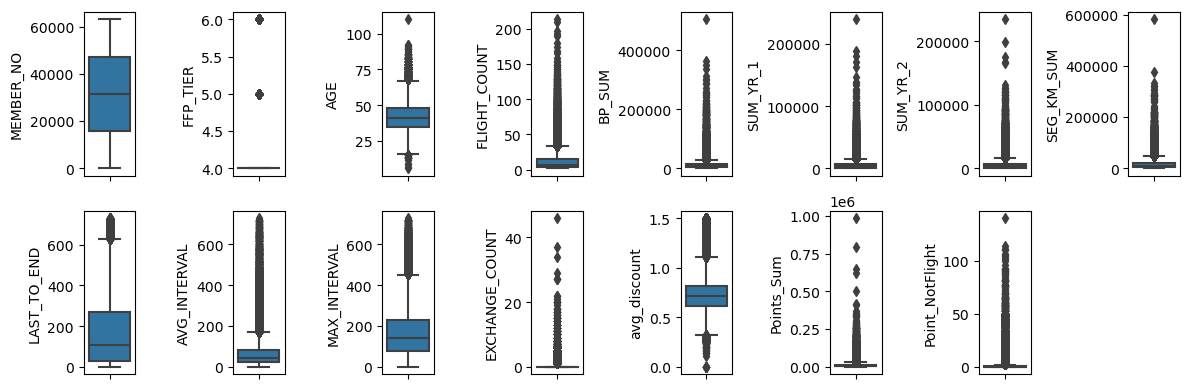

In [12]:
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.boxplot(y = df[nums[i]], orient='v')
    plt.tight_layout()

Dari visualisasi boxplot ditemukan adanya distribusi yang skew dan juga memiliki banyak outlier

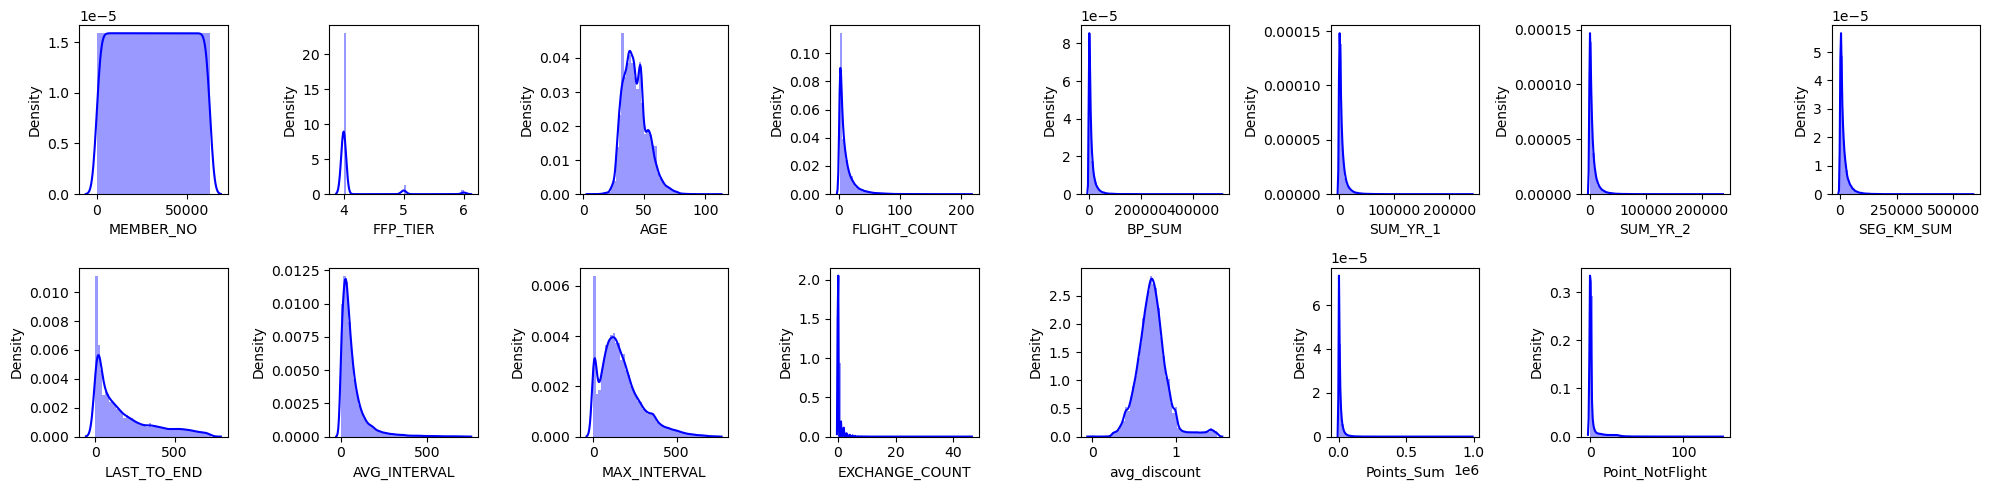

In [13]:
plt.figure(figsize = (20,5))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.distplot(df[nums[i]], color='blue')
    plt.tight_layout()

Dari distribusi diatas, menunjukan bahwa sebagian besar data memiliki skew positif yang cukup ekstrim.

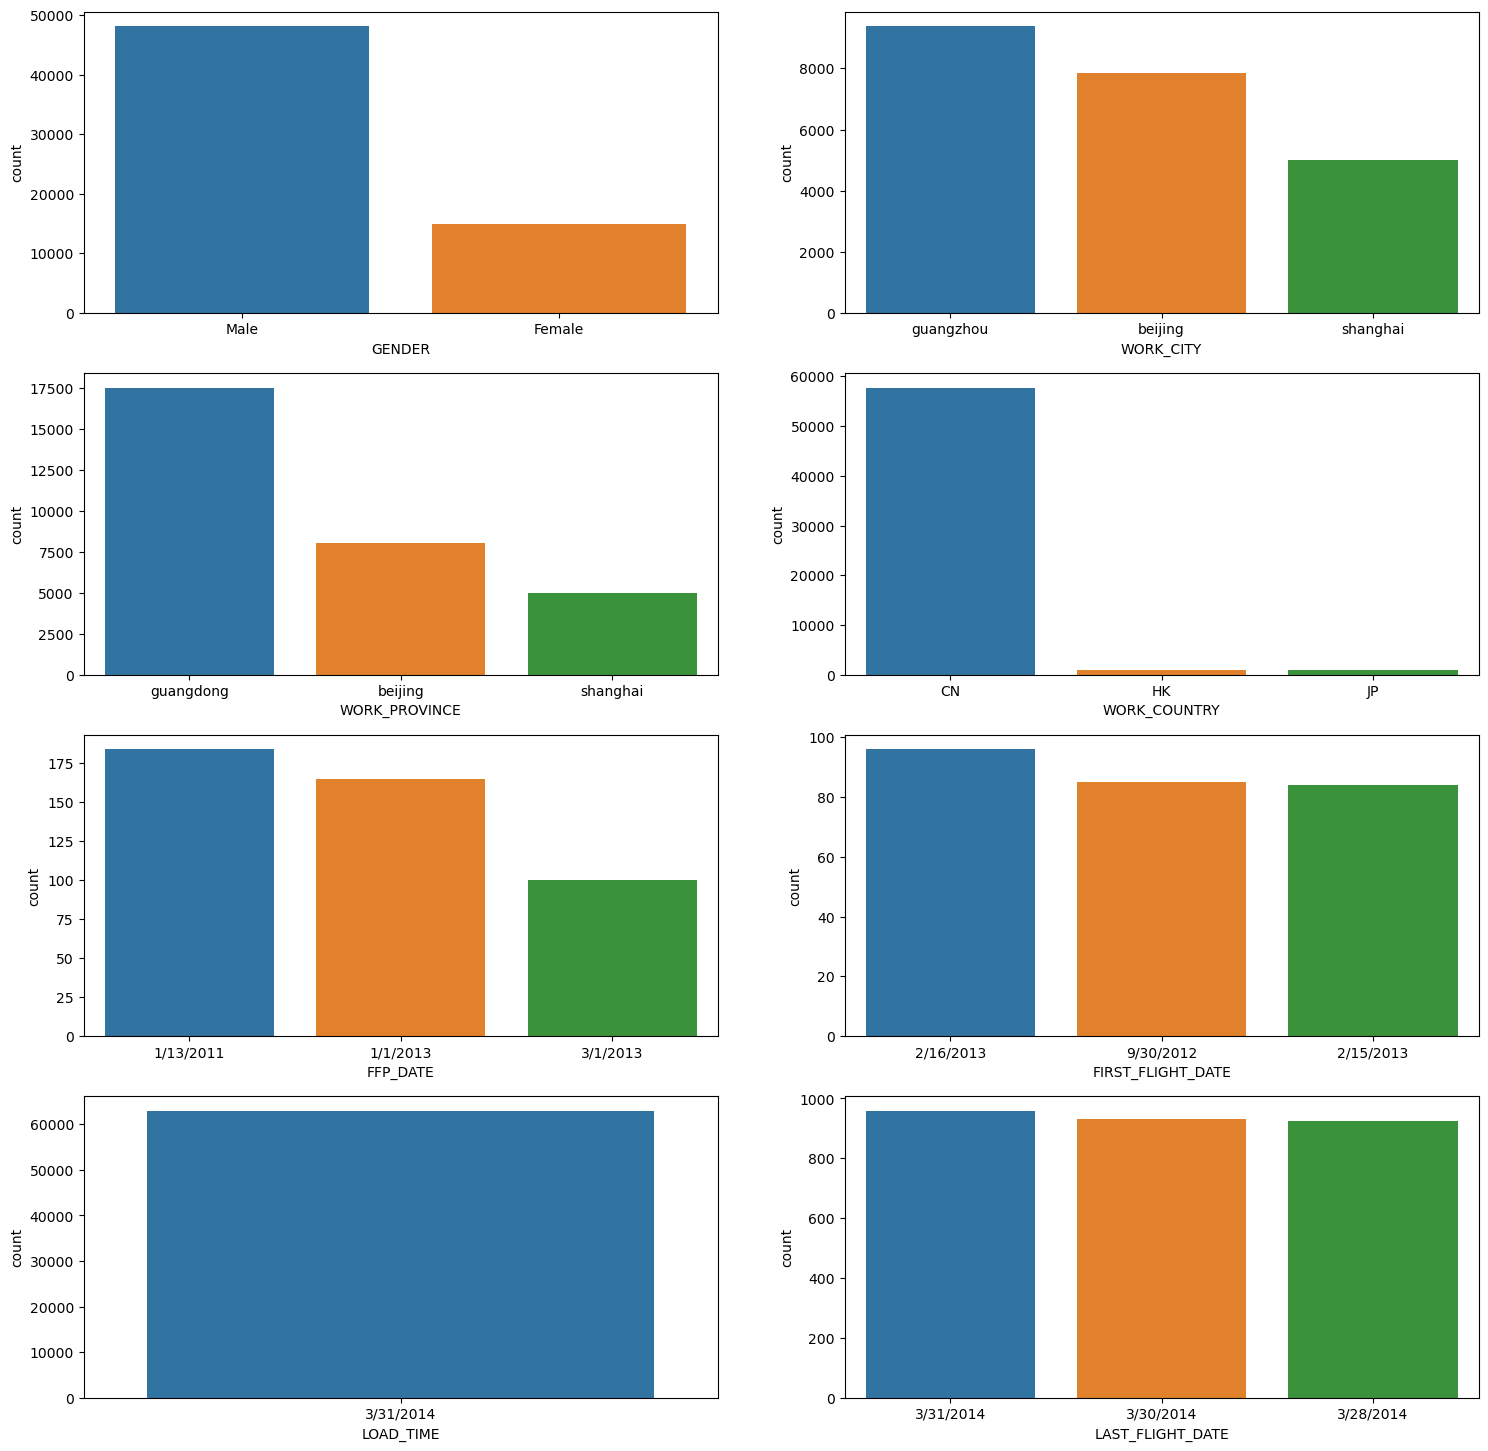

In [14]:
n=4
fig = plt.figure(figsize=(18, 18))
for i in range(0, len(cats)):
    fig.add_subplot(n, math.ceil(len(cats)/n), i+1)
    bar = sns.countplot(x=df[cats[i]], orient='h', order=df[cats[i]].value_counts().iloc[:3].index)

- Kolom `Gender` pada male lebih besar signifikan daripada female
- Kolom `WORK_CITY`, untuk top 3 ditemukan :
    - guangzhou    9386
    - beijing      7845
    - shanghai     5001
- Kolom `WORK_PROVINCE`, untuk top 3 ditemukan :
    - guangdong        17509
    - beijing           8014
    - shanghai          4998
- Kolom `WORK_COUNTRY`, untuk top 3 ditemukan :
    - CN    57748
    - HK      991
    - JP      875


## Multivariate Analysis

### Correlation Checking

In [15]:
dfa = df[nums]
dfa.corr()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
MEMBER_NO,1.000000,-0.005910,0.001259,-0.000276,0.000063,-0.002529,0.001185,-0.000032,-0.002588,0.002479,0.004761,-0.003844,0.001727,-0.003613,-0.033204
FFP_TIER,-0.005910,1.000000,0.078654,0.582447,0.581085,0.463122,0.611385,0.522350,-0.206313,-0.144928,-0.127641,0.342355,0.248845,0.559249,0.192803
AGE,0.001259,0.078654,1.000000,0.073246,0.100501,0.111815,0.083743,0.087254,-0.025600,-0.024613,0.009382,0.029604,0.133235,0.074757,-0.092282
FLIGHT_COUNT,-0.000276,0.582447,0.073246,1.000000,0.788379,0.748032,0.794838,0.850411,-0.404999,-0.316833,-0.188682,0.502501,0.139377,0.747092,0.291880
BP_SUM,0.000063,0.581085,0.100501,0.788379,1.000000,0.850624,0.884632,0.921724,-0.319039,-0.246764,-0.147953,0.530021,0.307245,0.923271,0.244254
SUM_YR_1,-0.002529,0.463122,0.111815,0.748032,0.850624,1.000000,0.663009,0.804125,-0.186173,-0.243309,-0.145206,0.488029,0.268884,0.788354,0.235095
SUM_YR_2,0.001185,0.611385,0.083743,0.794838,0.884632,0.663009,1.000000,0.849195,-0.423420,-0.246290,-0.154905,0.468149,0.234652,0.826666,0.237954
SEG_KM_SUM,-0.000032,0.522350,0.087254,0.850411,0.921724,0.804125,0.849195,1.000000,-0.369509,-0.280746,-0.155508,0.507819,0.108393,0.853014,0.259037
LAST_TO_END,-0.002588,-0.206313,-0.025600,-0.404999,-0.319039,-0.186173,-0.423420,-0.369509,1.000000,-0.108594,-0.343939,-0.169717,-0.021036,-0.292027,-0.124074
AVG_INTERVAL,0.002479,-0.144928,-0.024613,-0.316833,-0.246764,-0.243309,-0.246290,-0.280746,-0.108594,1.000000,0.724392,-0.130226,-0.038814,-0.220946,-0.075967


<Axes: >

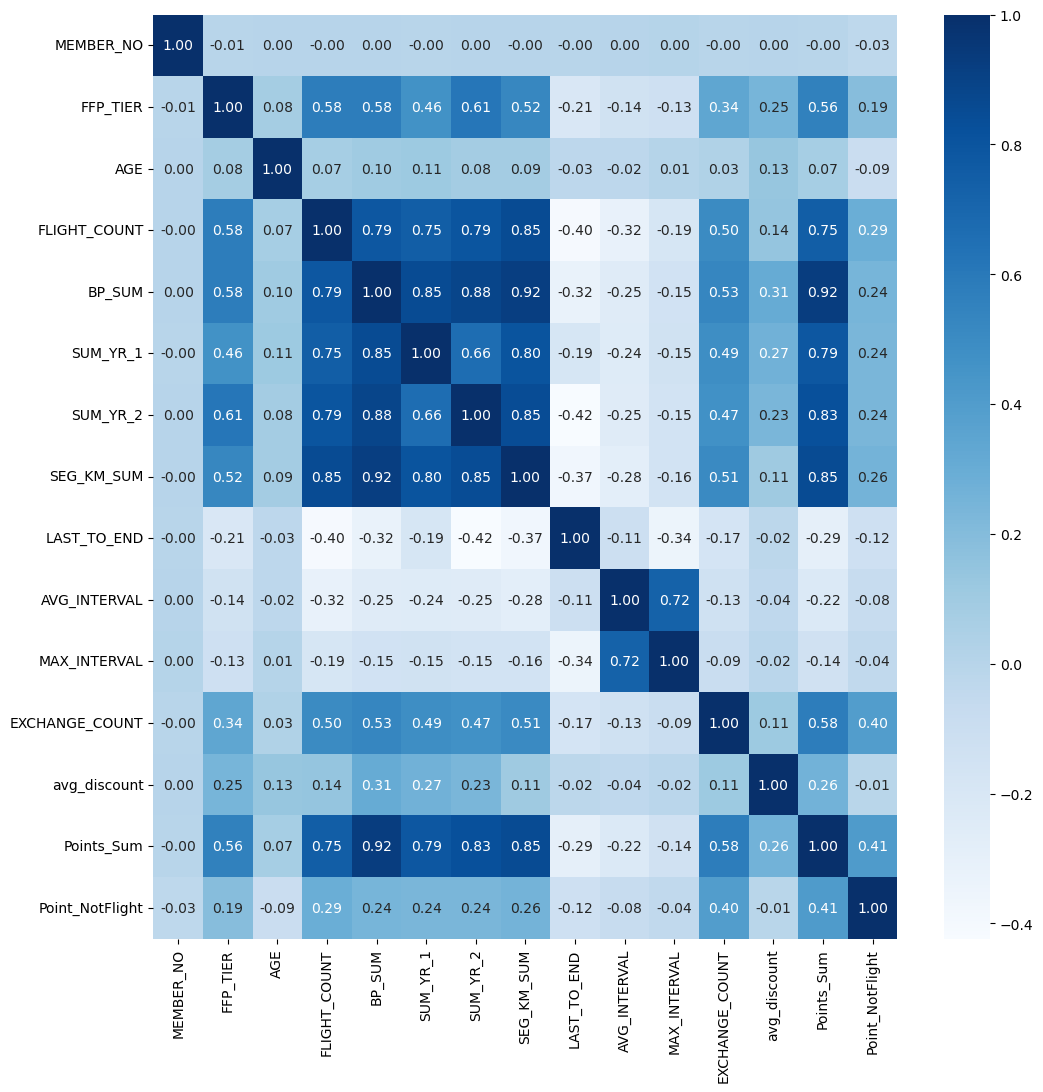

In [16]:
plt.figure(figsize=(12, 12))
sns.heatmap(dfa.corr(), cmap='Blues', annot=True, fmt='.2f')

Terdapat beberapa kolom yang memiliki korelasi yang sangat tinggi satu sama lain, yaitu:
- FFP_TIER
- FLIGHT_COUNT
- BP_SUM
- SUM_YR_1
- SUM_YR_2
- SEG_KM_SUM
- EXCHANGE_COUNT
- Points_Sum

## Data preprocessing

Karena total missing value di kolom maka akan dilakukan drop atau imputasi.

Pada kolom 'AGE','SUM_YR_1','SUM_YR_2' karena nilai missing values masih sekitar 1% maka akan kitya coba untuk imputasi
- AGE	0.6%
- SUM_YR_1	0.8%
- SUM_YR_2 0.2%

untuk kolom yang lumayan besar dan sangat kecil, maka column data tersebut akan didrop.
- WORK_PROVINCE	5%
- WORK_CITY	3%
- WORK_COUNTRY 0.04%
- GENDER 0.004%

In [17]:
# handling missing data
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())

df = df.drop(['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], axis = 1)

Pada kolom-kolom 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE' yang berbentuk tanggal akan diubah tipe datanya menjadi datetime.

Sebelum mengubah ke datetime, didapatkan pada kolom 'LAST_FLIGHT_DATE' tanggal 29-02-2014. Yang mana tidak ada pada calendar periode yang ada. Maka diasumsikan memiliki tangal 28-02-2014

In [18]:
df[df['LAST_FLIGHT_DATE'].str.contains('2014/2/29')].head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,6/17/2007,6/17/2007,6,46.0,3/31/2014,53,116307,30884.0,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,5,70.0,3/31/2014,31,96739,26510.0,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,5,39.0,3/31/2014,49,84754,28693.0,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,5,40.0,3/31/2014,80,61418,32900.0,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,5,50.0,3/31/2014,27,65918,23892.0,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4


In [19]:
df.loc[
    df['LAST_FLIGHT_DATE'].str.contains('2014/2/29'),
    ['LAST_FLIGHT_DATE']] = '2014/2/29 0:00:00'

In [20]:
from datetime import datetime, timedelta
df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']] = df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']].apply(pd.to_datetime, errors='coerce')

In [21]:
# Drop missing values
df = df.dropna().reset_index(drop=True)

# FEATURE ENGINEERING

Fitur dipilih menggunakan model LRFMC dimana fitur yang digunakan untuk model ini adalah: load_time, ffp_date, last_to_end, flight_count, seg_km_sum, avg_discount
- Loyalty L = LOAD_TIME - FFP_DATE : Jumlah bulan sejak customer bergabung hingga waktu pengambilan dataset (melihat apakah customer lama/baru)
- Recency R = LAST_TO_END : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
- Frequency F = FLIGHT_COUNT : Jumlah penerbangan customer
- Monetary M = SEG_KM_SUM : Total jarak penerbangan yg sudah dilakukan
- Cabin C = avg_discount : Rata rata discount yang didapat customer

Hal ini diharapkan, dalam melakukan customer segmentation berdasarkan nilai LRFMC masing-masing customer. Sehingga dapat memilih strategi marketing yang tepat sesuai behaviour masing-masing cluster dengan lebih efektif.

### Creating a New Data Frame

In [22]:
# Membuat dataframe baru untuk LRFMC
df_LRFMC = pd.DataFrame()
df_LRFMC['Loyalty'] = ((df['LOAD_TIME'] - df['FFP_DATE']).dt.days/30)
df_LRFMC['Recency'] = df['LAST_TO_END']
df_LRFMC['Frequency'] = df['FLIGHT_COUNT']
df_LRFMC['Monetary'] = df['SEG_KM_SUM']
df_LRFMC['Cabin'] = df['avg_discount']
df_LRFMC

,Loyalty,Recency,Frequency,Monetary,Cabin
0,90.200000,1,210,580717,0.961639
1,86.566667,7,140,293678,1.252314
2,87.166667,11,135,283712,1.254676
3,68.233333,97,23,281336,1.090870
4,60.533333,5,152,309928,0.970658
...,...,...,...,...,...
62562,34.866667,297,2,1134,0.000000
62563,49.466667,89,4,8016,0.000000
62564,97.433333,29,2,2594,0.000000
62565,13.933333,400,2,3934,0.000000


### Handling Outlier

Sebelum melakukan clustering, penting untuk Handling Outliers terlebih dahulu pada data extraction yang akan digunakan. Kami menggunakan metode Z Score, agar tidak terlalu banyak data yang akan hilang.

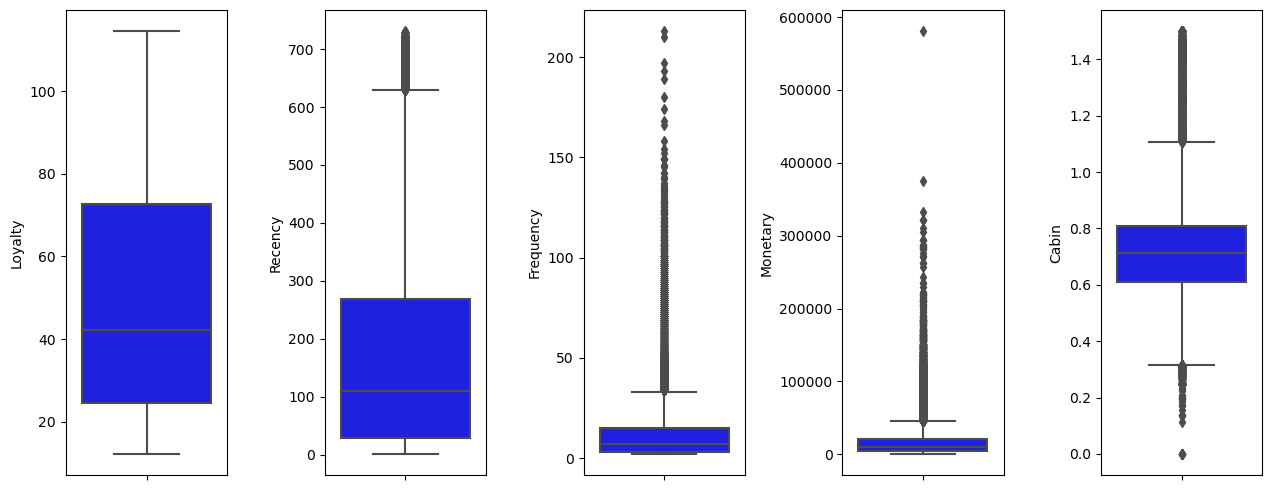

In [23]:
plt.figure(figsize=(18,5))

feature = list(df_LRFMC)
for i in range(0, len(feature)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_LRFMC[feature[i]],color='blue', orient='v')
    plt.tight_layout()

In [24]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_LRFMC)}')

filtered_entries = np.array([True] * len(df_LRFMC))

for col in feature:
    zscore = abs(stats.zscore(df_LRFMC[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df_LRFMC = df_LRFMC[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_LRFMC)}')

Jumlah baris sebelum memfilter outlier: 62567
Jumlah baris setelah memfilter outlier: 59475


### Scaling

Karena akan digunakan K-Means yang merupakan Machine learning berdasarkan jarak sehingga scalling data yang digunakan adalah standarisasi.

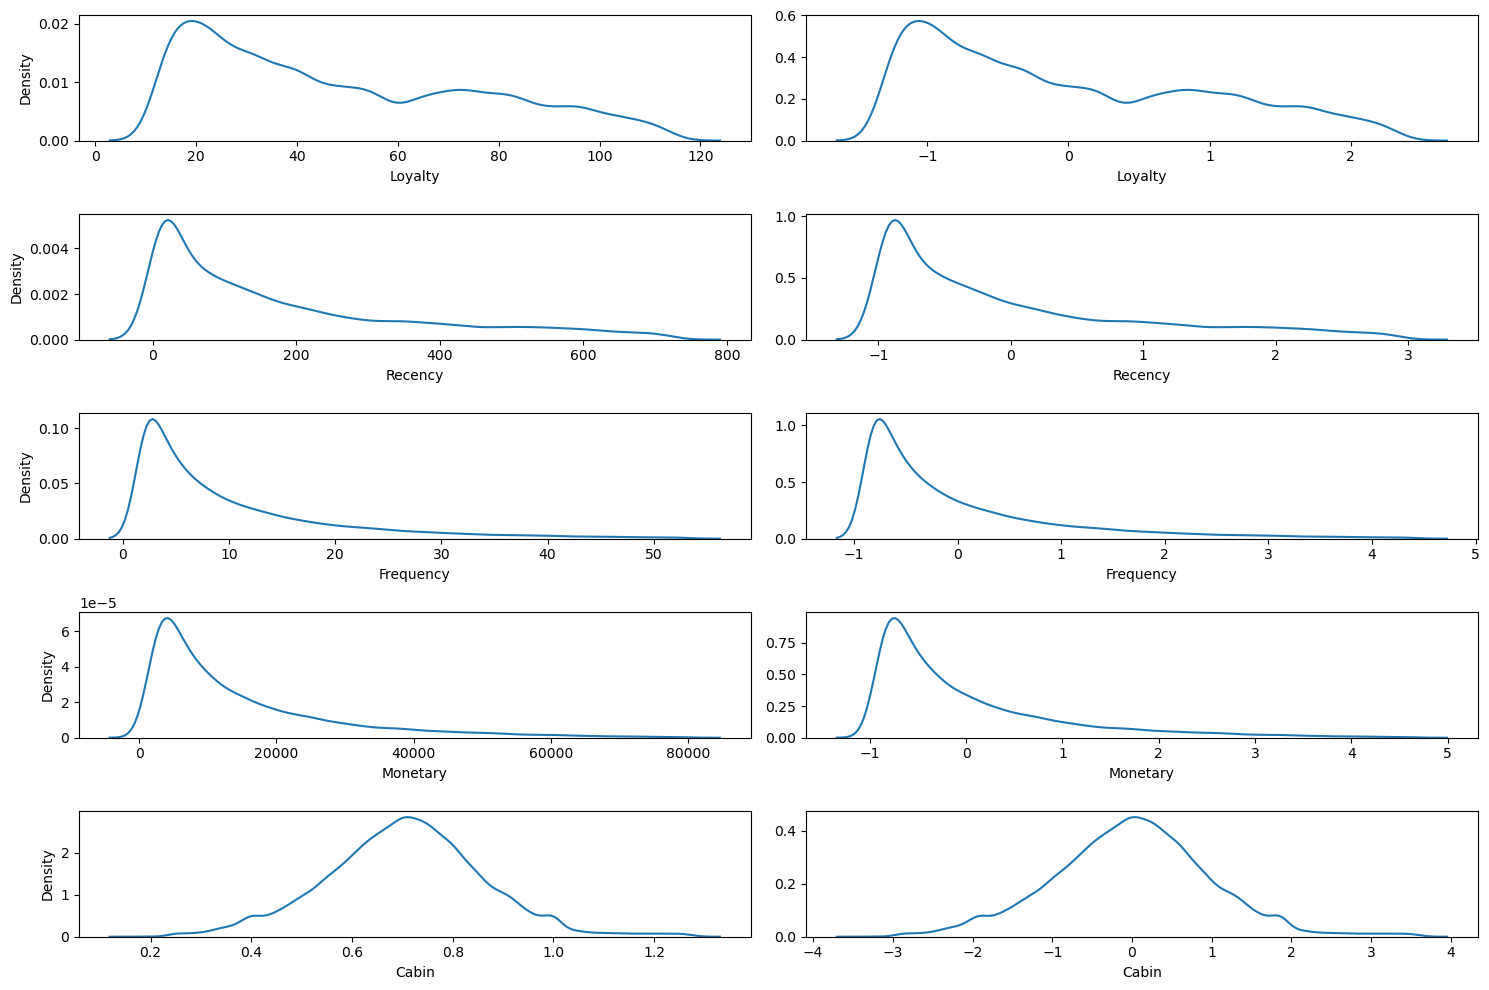

In [25]:
cols = df_LRFMC.columns
# Standardize data
std = StandardScaler().fit_transform(df_LRFMC)
df_LRFMC_temp = pd.DataFrame(std, columns = list(df_LRFMC))
# Plot distribution
fig, ax = plt.subplots(len(cols),2,figsize=(15,10))
for i in range(0,len(cols)):
    kde1 = sns.kdeplot(df_LRFMC[cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(df_LRFMC_temp[cols[i]], ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [26]:
# Standardize data
std = StandardScaler().fit_transform(df_LRFMC)
df_LRFMC_std = pd.DataFrame(std, columns = list(df_LRFMC))
df_LRFMC_std

,Loyalty,Recency,Frequency,Monetary,Cabin
0,1.208373,-0.591563,4.289657,4.380582,3.307799
1,-0.895824,-0.959739,3.572130,4.260724,3.426038
2,-0.471888,-0.981397,4.187153,4.061673,3.451065
3,-0.995854,-0.938082,3.367123,4.045578,3.281898
4,-0.170608,-0.927253,3.367123,3.966527,3.288521
...,...,...,...,...,...
59470,0.591523,-0.331674,-0.835531,-1.010816,-0.222155
59471,-0.121784,-0.775651,-0.835531,-0.961391,-3.033753
59472,-1.188768,1.525451,-0.835531,-0.972644,-2.875798
59473,-0.455217,0.540038,-0.835531,-0.982899,-2.686252


In [27]:
df_LRFMC_std.describe()

,Loyalty,Recency,Frequency,Monetary,Cabin
count,5.947500e+04,5.947500e+04,5.947500e+04,5.947500e+04,5.947500e+04
mean,-8.888504e-17,-3.058410e-17,4.587615e-17,1.529205e-17,4.434695e-16
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.309042e+00,-9.813965e-01,-8.355309e-01,-1.010816e+00,-3.371725e+00
25%,-8.839157e-01,-8.027227e-01,-7.330272e-01,-7.076459e-01,-6.264951e-01
50%,-2.599207e-01,-3.641597e-01,-3.230122e-01,-3.592532e-01,5.509500e-03
75%,8.201623e-01,5.183807e-01,2.920103e-01,3.570811e-01,5.992111e-01
max,2.349188e+00,2.960256e+00,4.392160e+00,4.659894e+00,3.619177e+00


Berdasarkan hasil pengecekan pada beberapa fitur yang telah diproses menggunakan transformation sebelumnya, dapat diketahui bahwa keseluruhan nilai sudah memiliki rentang yang lebih seragam (tidak jauh dan tidak terlalu bervariasi). Sehingga dapat disimpulkan bahwa teknik fitur transformation yang telah kami lakukan sudah valid.

### Correlation Plot

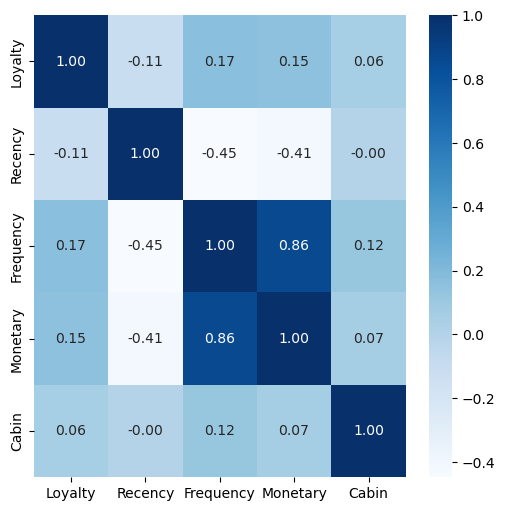

In [28]:
# heatmap correlation
corr = df_LRFMC_std.corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f')
plt.show()

Feature 'Frequency' and 'Monetary' is highly correlated, which means the more frequent of a customer flies, the further flight distance in total.

# MODELING + EVALUATION

## Clustering

<Axes: >

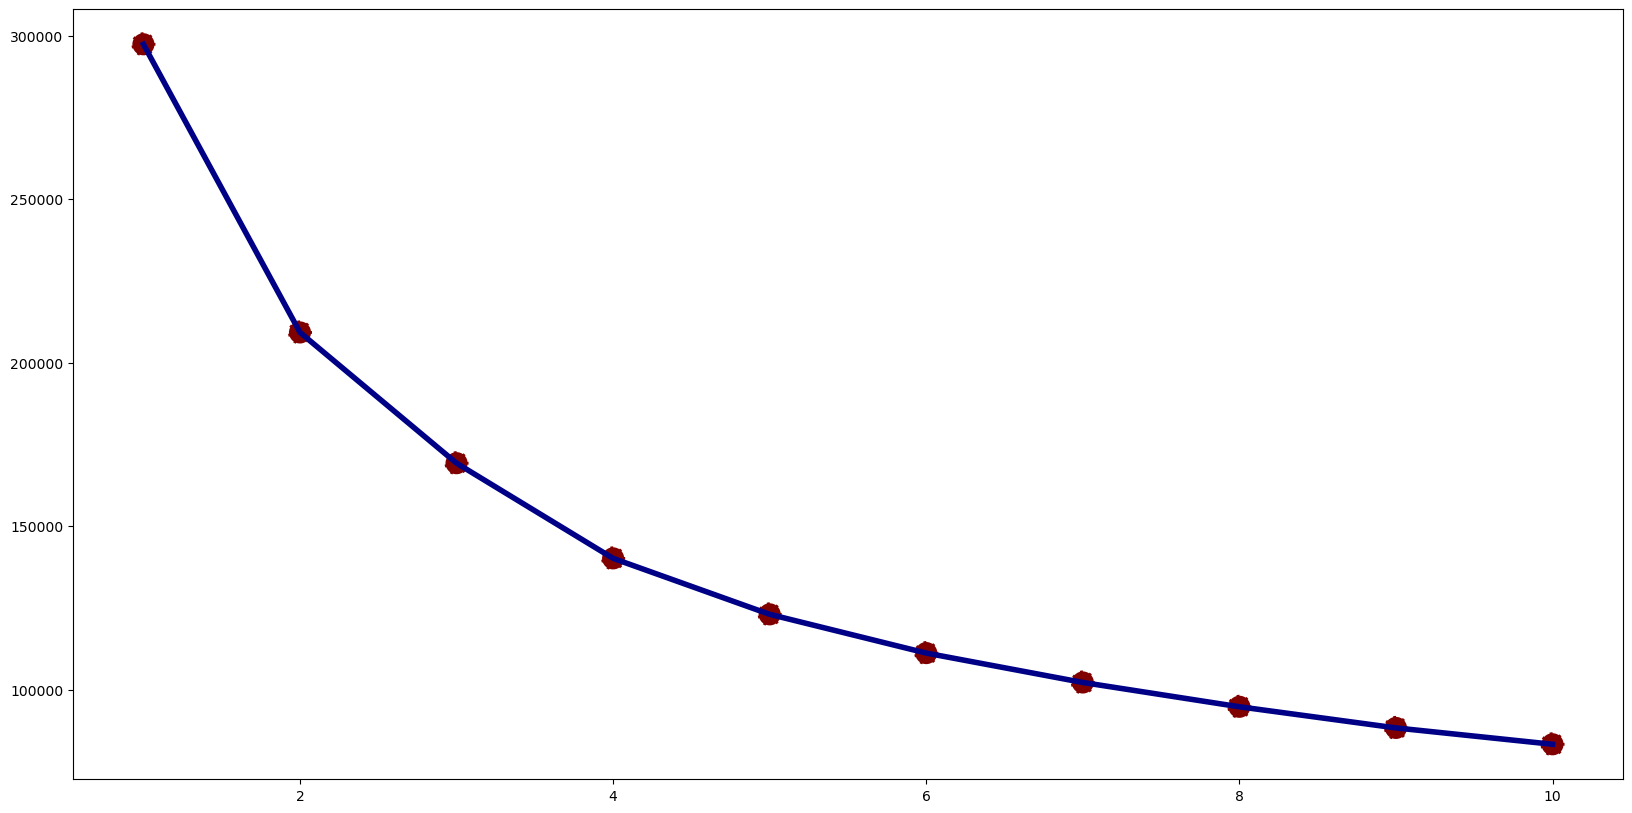

In [29]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_LRFMC_std)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [30]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    29.633129
1    19.106417
2    17.195724
3    12.209738
4     9.628013
5     8.082790
6     7.271840
7     6.821112
8     5.662475
9          NaN
dtype: float64

In [31]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [32]:
from sklearn.metrics import silhouette_score

arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_LRFMC_std)
    preds = kmeans.predict(df_LRFMC_std)

    score_euclidean = silhouette_score(df_LRFMC_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

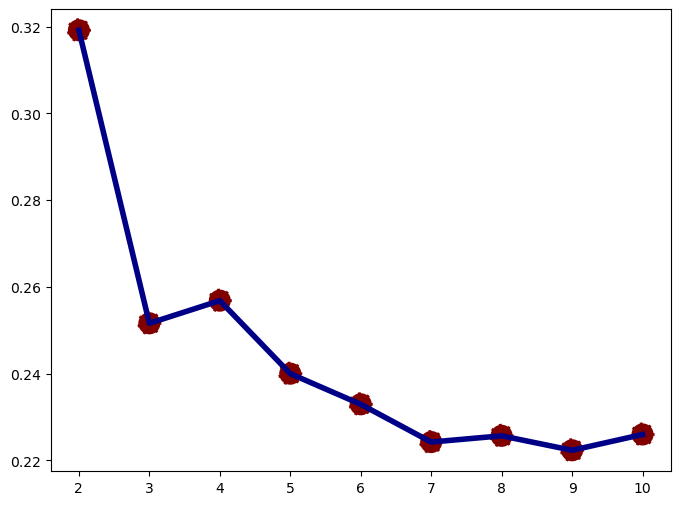

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

From the "Silhouette Score" by using "Elbow Method" above, The most optimal amount of cluster is 4 clusters

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_LRFMC_std.values)

KMeans(n_clusters=4, random_state=0)

In [35]:
df_LRFMC_std['cluster'] = kmeans.labels_
df_LRFMC['cluster'] = kmeans.labels_
df_LRFMC_std.head()

,Loyalty,Recency,Frequency,Monetary,Cabin,cluster
0,1.208373,-0.591563,4.289657,4.380582,3.307799,1
1,-0.895824,-0.959739,3.572130,4.260724,3.426038,1
2,-0.471888,-0.981397,4.187153,4.061673,3.451065,1
3,-0.995854,-0.938082,3.367123,4.045578,3.281898,1
4,-0.170608,-0.927253,3.367123,3.966527,3.288521,1


In [36]:
#merge with original dataset
df_clustered = pd.merge(df_LRFMC, df_LRFMC_std, left_index=True, right_index=True)
df_clustered
#['Loyalty_x', 'Recency_x', 'Frequency_x', 'Monetary_x', 'Cabin_x', 'cluster']

,Loyalty_x,Recency_x,Frequency_x,Monetary_x,Cabin_x,cluster_x,Loyalty_y,Recency_y,Frequency_y,Monetary_y,Cabin_y,cluster_y
473,82.633333,73,52,76072,1.228696,1,0.692743,-0.921839,4.289657,4.005768,0.060493,1
482,23.733333,5,45,74389,1.247410,1,1.872856,-0.894767,3.674634,3.118406,1.009433,1
538,35.600000,1,51,71594,1.251371,1,2.009802,-0.981397,2.854604,2.283674,2.272112,1
568,20.933333,9,43,71368,1.224597,1,-0.209906,-0.190900,2.957108,3.983406,-0.040997,1
592,44.033333,11,43,70258,1.225645,1,0.630820,-0.808137,3.059612,3.825091,0.073550,1
...,...,...,...,...,...,...,...,...,...,...,...,...
59470,22.700000,502,2,1868,0.684690,3,0.591523,-0.331674,-0.835531,-1.010816,-0.222155,2
59471,76.833333,58,2,2030,0.630000,2,-0.121784,-0.775651,-0.835531,-0.961391,-3.033753,0
59472,57.300000,1,2,2750,0.465000,0,-1.188768,1.525451,-0.835531,-0.972644,-2.875798,3
59473,104.533333,573,2,3934,0.325000,3,-0.455217,0.540038,-0.835531,-0.982899,-2.686252,0


## Visualization using PCA and Scatterplot

Using scatterplot in purpose to visually observe the *Dimensional Reduction* by using PCA

In [37]:
from sklearn.decomposition import PCA

#PCA with component = 2
pca = PCA(n_components=2)

pca.fit(df_LRFMC_std)
pcs = pca.transform(df_LRFMC_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = kmeans.labels_
data_pca.head()

,PC 1,PC 2,clusters
0,4.704661,4.421910,1
1,4.511718,2.920081,1
2,4.723844,3.317943,1
3,4.295256,2.677554,1
4,4.244723,3.111765,1


<Axes: xlabel='PC 1', ylabel='PC 2'>

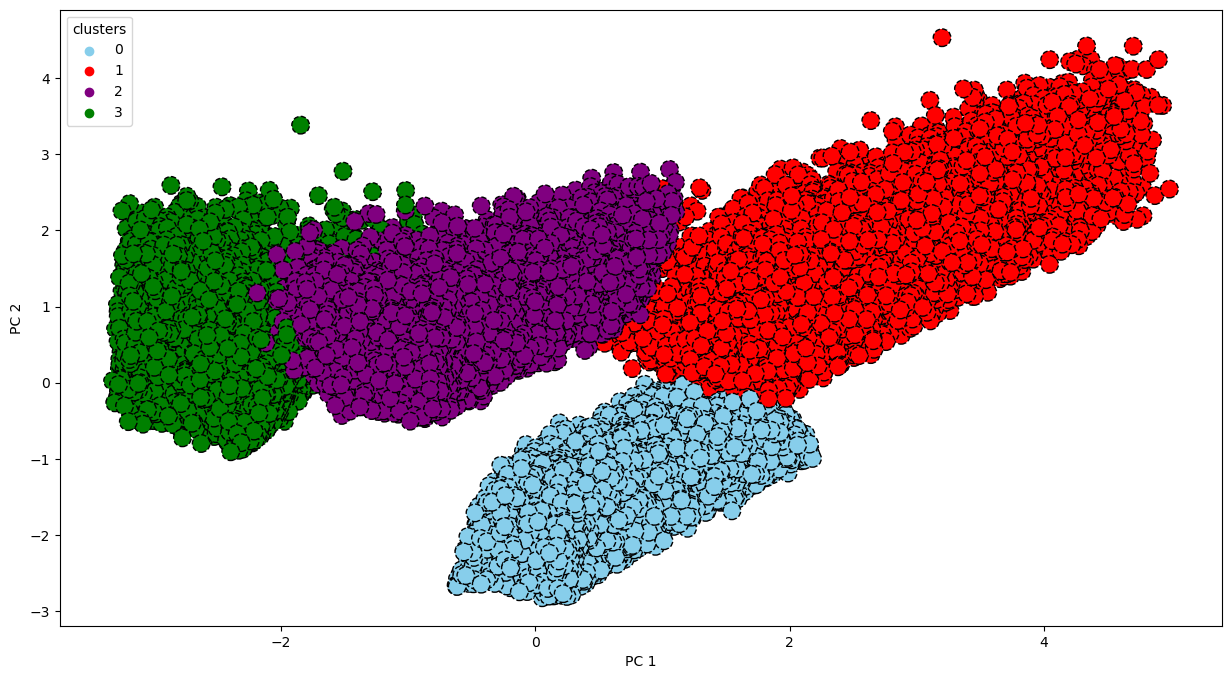

In [38]:
# Plot the cluster in scatterlot

fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['skyblue','red','purple','green'],
    s=160,
    ax=ax
)

From the result of scatterplot above can be inferred that **amount of clusters (n_clusters) equal to 4 is the best amount of clusters**. Which can be seen the cluster segmentations are well separated.

**Silhouette Score Plot**

For n_clusters = 4 The average silhouette_score is : 0.39295755814833944


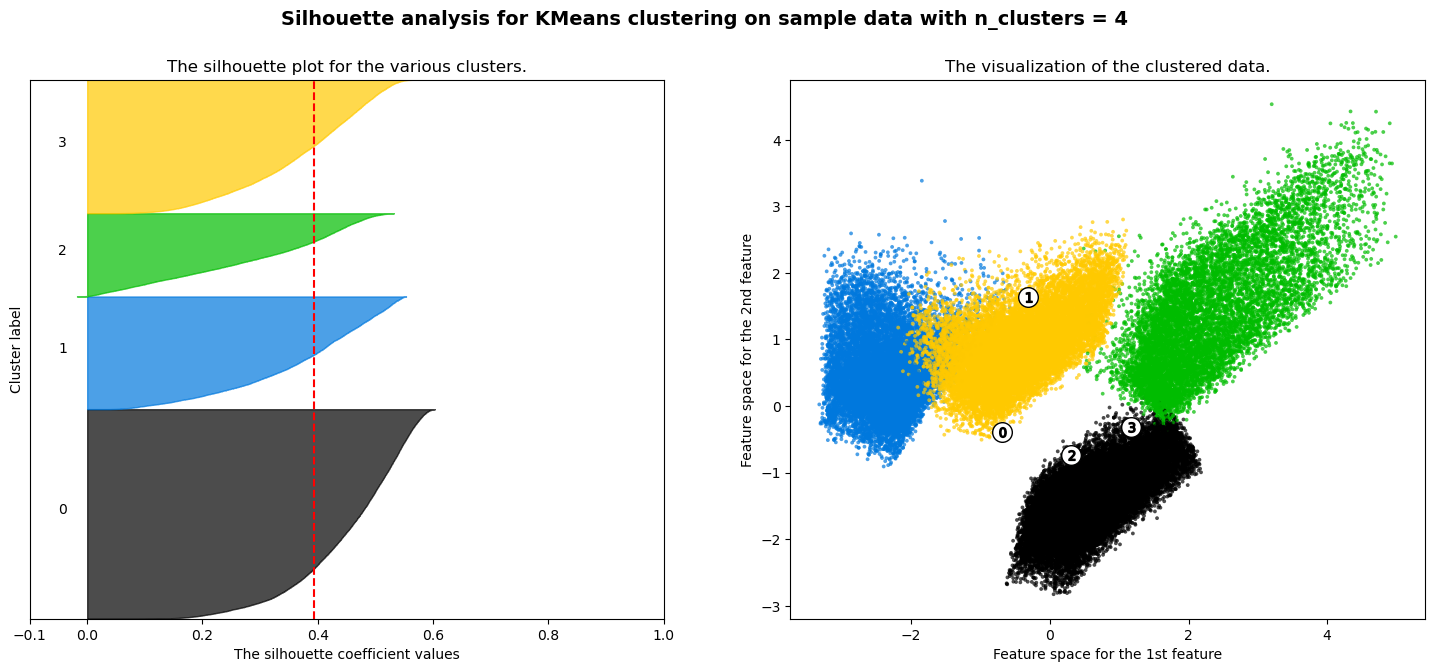

In [39]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = df_LRFMC_std

range_n_clusters = [4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_pca.iloc[:, 0], data_pca.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# INTERPRETASI MODEL + RECCOMENDATION

## Features Statistic by each clusters

In [40]:
cluster = kmeans.labels_
df_LRFMC_std['clusters'] = cluster

In [41]:
# Amount of customers by each clusters
df_clus = df_LRFMC_std['clusters'].value_counts().reset_index()
df_clus.columns = ['cluster','costumer']
df_clus['percentage (%)'] = round((df_clus['costumer']/(sum(df_clus['costumer'])))*100,2)
df_clus

,cluster,costumer,percentage (%)
0,0,23128,38.89
1,2,14730,24.77
2,3,12438,20.91
3,1,9179,15.43


Quantity and percentage of customers by each segmentations are no evenly distributed

Text(0.5, 1.0, 'Jumlah Customer Untuk Setiap Cluster')

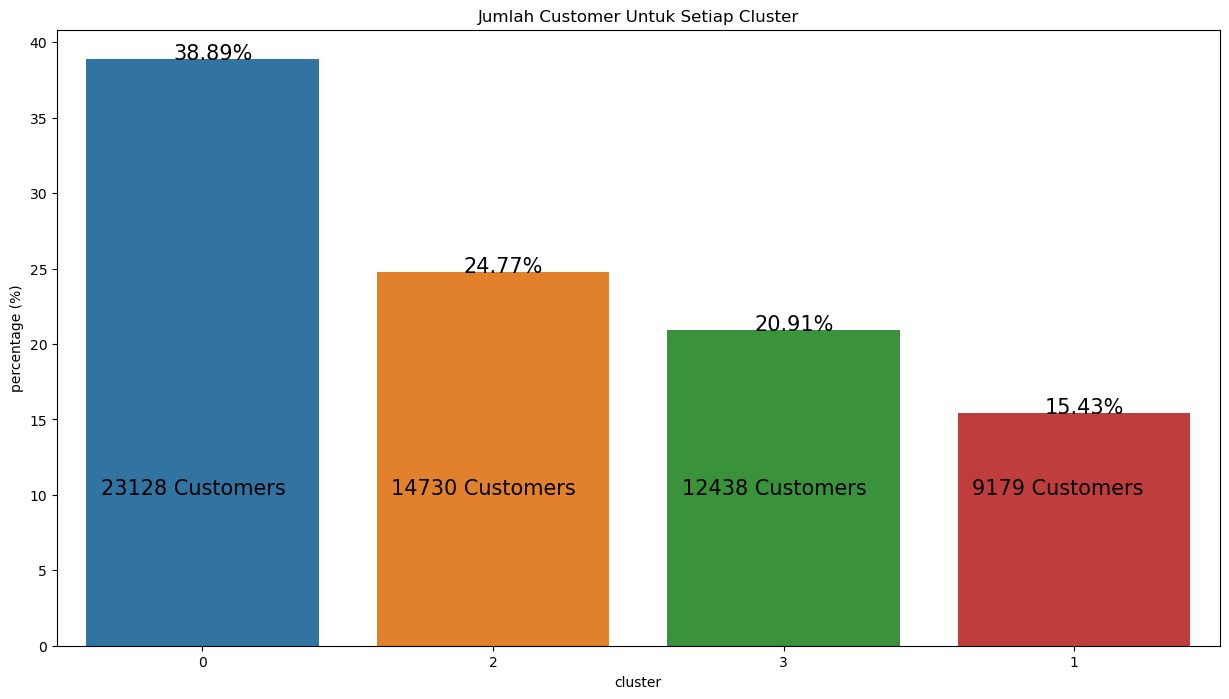

In [42]:
fig, ax = plt.subplots(figsize=(15,8))

br = sns.barplot(x = 'cluster',y='percentage (%)',
                 data=df_clus,ax=ax,
                 order=df_clus.sort_values('percentage (%)',ascending = False).cluster)

x = np.arange(len(df_clus['cluster']))
y = df_clus['percentage (%)']
z = df_clus['costumer']

x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i]-0.1 , y = y[i], s = str(y[i])+'%', size = 15) # add data points

x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i]-0.35 , y = 10, s = str(z[i])+' Customers', size = 15) # add data points

plt.title('Jumlah Customer Untuk Setiap Cluster')

## Mean-Median LRFMC by each clusters

In [43]:
display(df_LRFMC.groupby('cluster').agg(['mean','median']))

Loyalty                Recency         Frequency         \
              mean     median        mean median       mean median   
cluster                                                              
0        29.294559  27.400000  109.635853   92.0   7.720209    7.0   
1        57.426506  54.066667   46.864909   23.0  28.503214   27.0   
2        81.546363  80.166667  124.829328  101.0   8.043041    7.0   
3        39.965579  33.166667  485.225599  480.0   3.624859    3.0   

             Monetary              Cabin            
                 mean   median      mean    median  
cluster                                             
0        11008.085697   9313.5  0.683366  0.687689  
1        40732.175400  38196.0  0.740208  0.727464  
2        11412.216633   9835.0  0.714499  0.712327  
3         5585.111594   4154.0  0.708767  0.716667

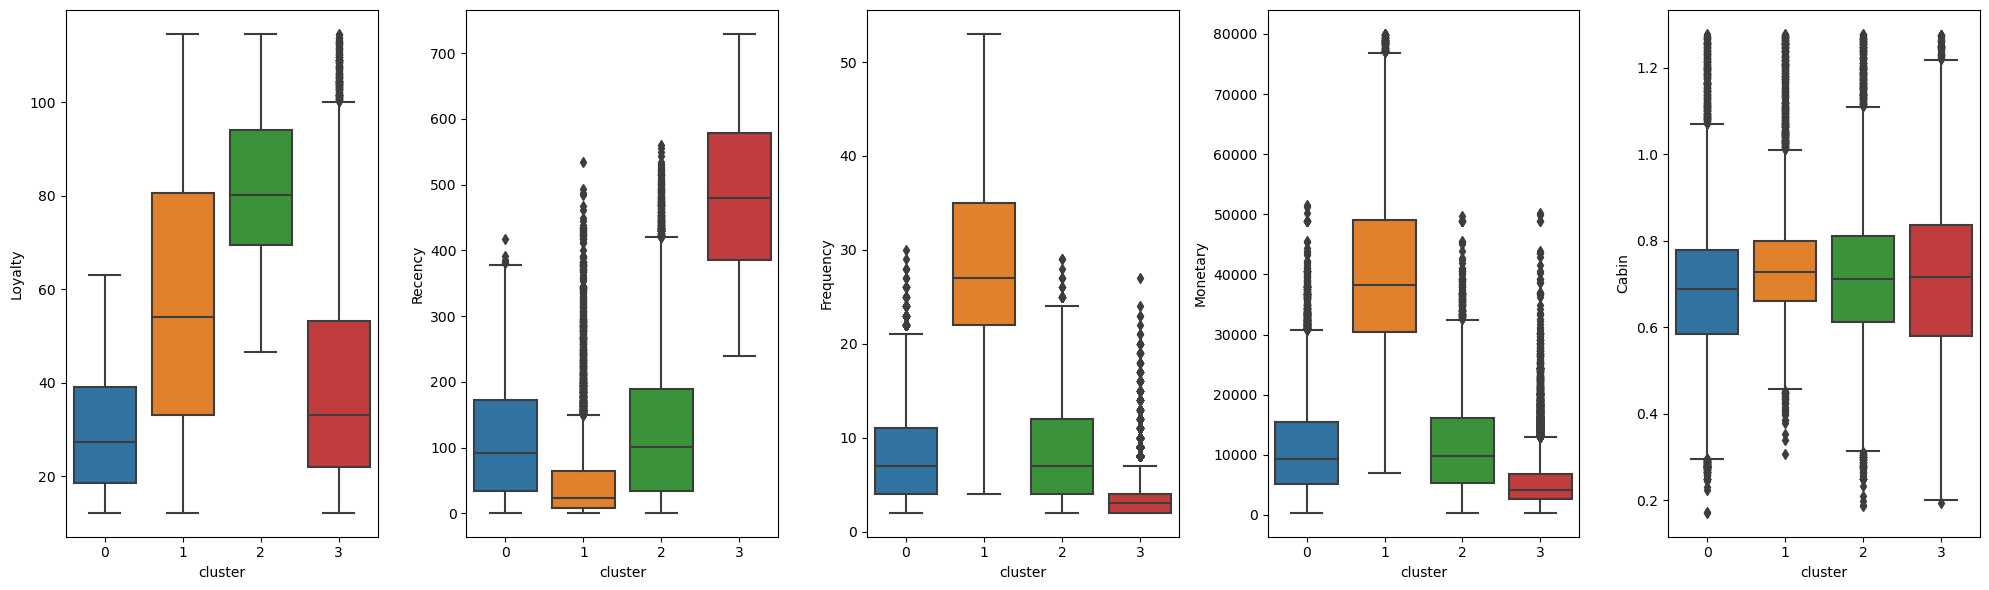

In [44]:
fig, axes = plt.subplots(1, 5, figsize=(20,6))
cols = [i for i in df_LRFMC.columns if i != "cluuters"]
for index, ax in enumerate(axes):
    sns.boxplot(x = df_LRFMC['cluster'], y = df_LRFMC[cols[index]], ax=ax)
    plt.tight_layout()

plt.show()

## Cluster Interpretation

From the "df_LRFMC" above, can be concluded that we can categorized each clusters as below:

- Cluster 0 : More than 7 years lifetime customers, rarely do flights and flight total distance is not too plenty.

- Cluster 1 : Nearly 5 years lifetime customers, actively enough in using flight services and often do a long-distance travel. (High_Value Customer)

- Cluster 2 : Around 2 years lifetime customers(relatively new), oftentimes doing flights and fair travel distance. (potential customer)

- Cluster 3 : Around 3 years lifetime customers(relatively new), but seldomly doing flights and short travel distance once using. (low_value customer)

## Business Strategy:

1. Focus on intensifying the marketing strategies for belonging to cluster 1. To increasing flights amount which are still low and haven't a flight for a long time, the marketing strategy can be carried by giving discount promo or partnership by travel agent to provide attractive vacation package promo, so that these customers will be interested to have a flight again using this airline.

2. Focus on retaining customer belonging to cluster 2 by offering premium airline memberships.
    
    